<a href="https://colab.research.google.com/github/Priti-Kannaujiya/DeepLearning-FromScratch/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.


In [ ]:
import pandas as pd
import numpy as np
import os
os.listdir(path)


['Churn_Modelling.csv']

In [ ]:
df=pd.read_csv(path+"/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_new=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [ ]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

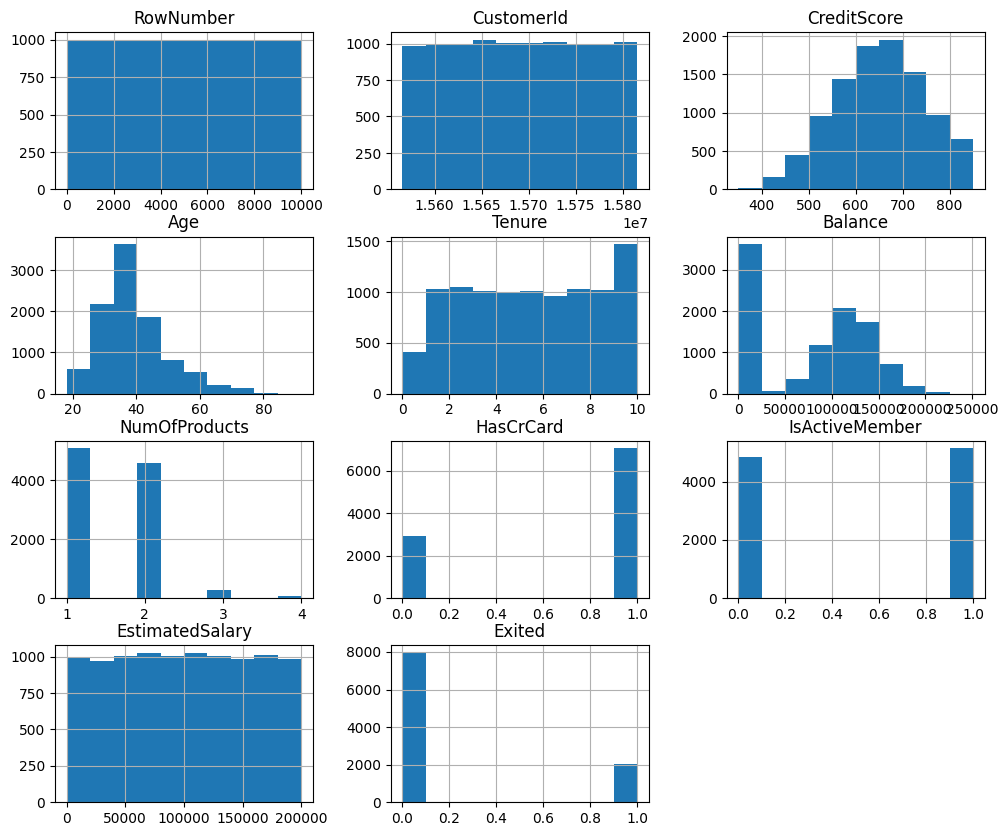

In [ ]:
df.hist(figsize=(12,10))

<Axes: xlabel='count', ylabel='Geography'>

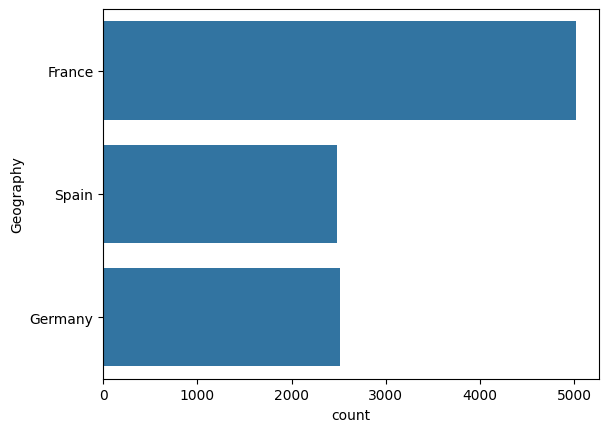

In [ ]:
sns.countplot(df['Geography'])

<Axes: xlabel='Exited', ylabel='count'>

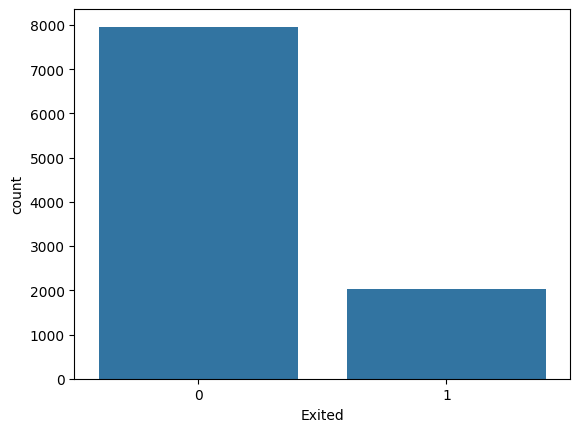

In [ ]:
sns.countplot(x=df['Exited'])

<Axes: xlabel='count', ylabel='Gender'>

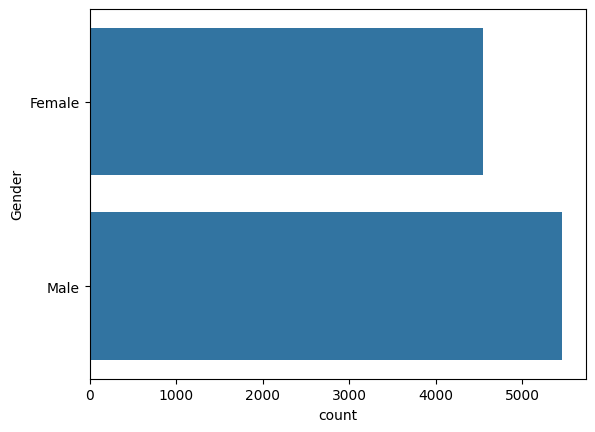

In [ ]:
sns.countplot(df['Gender'])

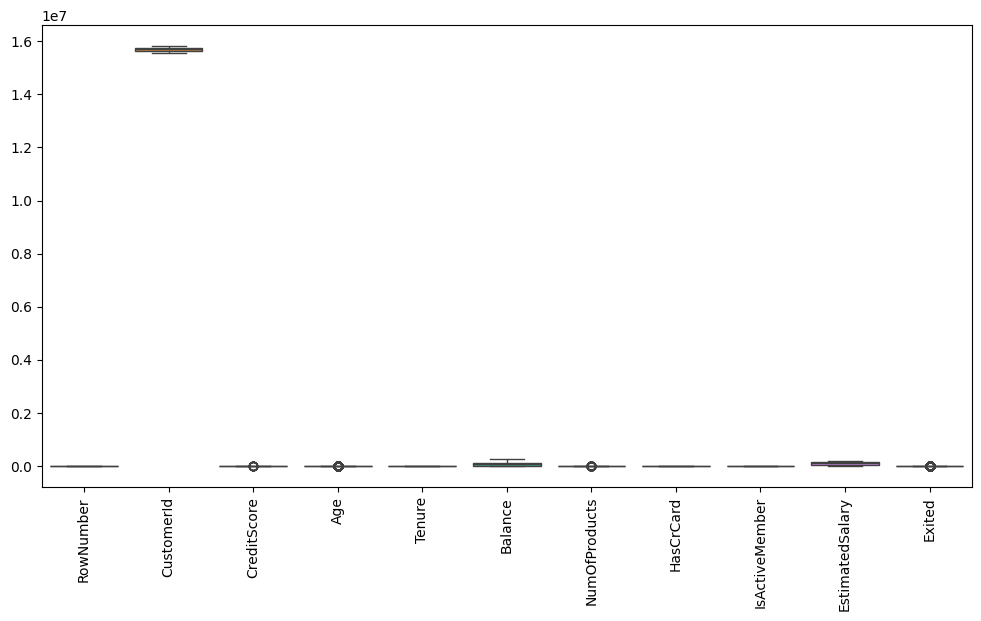

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [ ]:
numerical_cols_to_scale = df_encoded.select_dtypes(include='number').columns.drop('Exited', errors='ignore')
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

In [ ]:
df_encoded.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df_encoded.shape

(10000, 12)

In [ ]:
X=df_encoded.drop(columns=['Exited'])
y=df_encoded['Exited']
from sklearn.model_selection import train_test_split
X_train,Xtest,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Clear any previous model states to ensure a clean slate
keras.backend.clear_session()

# Determine the number of input features from X_train
input_features = X_train.shape[1]

# Define the model using an explicit Input layer, as recommended by Keras
model = Sequential([
    Input(shape=(input_features,)), # Explicitly define the input shape for the model
    Dense(11, activation='relu'),    # Hidden layer 1 with 'relu' activation
    Dense(11, activation='relu'),    # Hidden layer 2 with 'relu' activation
    Dense(1, activation='sigmoid')   # Output layer for binary classification
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6714 - loss: 0.6161 - val_accuracy: 0.7994 - val_loss: 0.5066
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4872 - val_accuracy: 0.8106 - val_loss: 0.4477
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.4444 - val_accuracy: 0.8156 - val_loss: 0.4235
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8149 - loss: 0.4322 - val_accuracy: 0.8313 - val_loss: 0.4079
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.4112 - val_accuracy: 0.8381 - val_loss: 0.3928
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8449 - loss: 0.3908 - val_accuracy: 0.8413 - val_loss: 0.3800
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8599 - loss: 0.3646 - val_accuracy: 0.8456 - val_loss: 0.3705
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8574 - loss: 0.3663 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-0.11986507, -0.12560083,  0.12637398, -0.13226101, -0.12297085,
         -0.19220905,  0.13779268, -0.12766811,  0.01725713,  0.02021932,
          0.01860866],
        [ 0.8933975 ,  0.18158501,  0.64438164, -0.01435306,  0.44380313,
         -0.80614364, -0.41598246, -0.6236772 , -0.51469976,  0.26846957,
          0.42809477],
        [-0.02289175,  0.09790306, -0.34078974, -0.28872988, -0.04971015,
          0.25719225, -0.29672492,  0.00508309, -0.19309635, -0.09091435,
         -0.1037951 ],
        [-0.09898677,  0.17153335, -0.21008068,  0.81366694, -0.5789965 ,
          0.12418538, -0.4510434 , -0.09386244,  0.62413293,  0.44604075,
          0.0178279 ],
        [ 1.39605   , -0.04355637,  0.16260082,  0.78140604, -0.7850403 ,
         -0.3813089 , -0.29374954,  0.14137764, -0.29747453, -0.12980951,
         -0.62323755],
        [ 0.00263537,  0.50883824,  0.1818723 ,  0.22662185,  0.0256019 ,
          0.02576648, -0.20976691, -0.07306892,  0.11725876, -0.3185615

In [ ]:
model.layers[1].get_weights()

[array([[ 0.23945346, -1.3830363 ,  0.33822232,  0.03061085, -0.00573038,
          0.6027145 ,  0.4249786 ,  0.37609673, -1.020324  , -0.10256822,
          1.0125991 ],
        [-0.7345879 ,  0.3484319 ,  0.22217737,  0.6021513 , -0.3423517 ,
         -0.23001622,  0.577449  ,  0.29926804,  0.07384924,  0.41946968,
         -0.15802993],
        [-0.25820458,  0.12566169, -0.26033056,  0.21008752, -0.30781358,
          0.6882183 ,  0.92310303,  0.16124362,  0.16226259, -0.1202043 ,
         -0.19329302],
        [ 0.52156603,  0.2914555 , -0.5300804 , -0.09532637,  0.7819989 ,
          0.24264355,  0.04503492, -0.865273  , -0.38565442, -0.37568113,
          0.5515939 ],
        [-0.25616238,  0.39964852, -0.12287978, -0.40431187,  0.5086589 ,
          0.51492184, -0.6683323 , -0.27544466,  0.42742923, -0.5500975 ,
         -0.5746903 ],
        [-0.28132987, -0.11497217,  0.204704  , -0.59133714,  0.5659303 ,
          0.19977774, -0.17468949,  0.05148759,  0.62762   ,  0.0027529

In [ ]:
y_pred = model.predict(Xtest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred.shape

(2000, 1)

In [ ]:
y_pred1=np.where(y_pred>0.5,1,0)
y_pred1.shape

(2000, 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.862